<a href="https://colab.research.google.com/github/leonardoLavagna/TCGA-PRAD/blob/main/DEPM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEPM First Project 
# Prostate Adenocarcinoma TCGA-PRAD  



## PART I DATA 
### I.1 Installation of the required libraries and set up

In [ ]:
# Execute the following 3 cells if and only if the bioconductor packages needed for this part are not installed. 
# The installation can take some time (in the order of minutes). 
# See https://bioconductor.org for more details. 

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [2]:
BiocManager::install("TCGAbiolinks")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'TCGAbiolinks'

also installing the dependencies ‘Biostrings’, ‘RSQLite’, ‘KEGGREST’, ‘AnnotationDbi’, ‘BiocFileCache’, ‘GenomeInfoDb’, ‘XVector’, ‘R.oo’, ‘Biobase’, ‘DelayedArray’, ‘biomaRt’, ‘GenomicRanges’, ‘plyr’, ‘IRanges’, ‘S4Vectors’, ‘R.utils’, ‘SummarizedExperiment’


Old packages: 'IRkernel', 'bslib', 'callr', 'data.table', 'devtools', 'digest',
  'ggplot2', 'jsonlite', 'lubridate', 'openssl', 'pkgload', 'processx', 'ps',
  'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun', 'yaml', 'zip',
  'foreign', 'mgcv', 'rpart'



In [3]:
BiocManager::install("SummarizedExperiment")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'SummarizedExperiment'”
Old packages: 'IRkernel', 'bslib', 'callr', 'data.table', 'devtools', 'digest',
  'ggplot2', 'jsonlite', 'lubridate', 'openssl', 'pkgload', 'processx', 'ps',
  'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun', 'yaml', 'zip',
  'foreign', 'mgcv', 'rpart'



In [4]:
# Libraries for data extraction

library(TCGAbiolinks)
library(SummarizedExperiment)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [5]:
# Directory tree set up

proj <- "TCGA-PRAD"
dir.create(file.path(proj))

### I.2 Getting the Data 
For references, see https://portal.gdc.cancer.gov/projects/TCGA-PRAD.

In [6]:
# Extract primary tumor data

rna.query.C <- GDCquery(project = proj, data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "STAR - Counts", sample.type = "Primary Tumor") # sample = 01 - TP
GDCdownload(query = rna.query.C, directory = "GDCdata", method = "api")
rna.data.C <- GDCprepare(rna.query.C)
rna.expr.data.C <- assay(rna.data.C)
rna.genes.info.C <- rowRanges(rna.data.C)
rna.sample.info.C <- colData(rna.data.C)
write.table(rna.expr.data.C, file=file.path(proj,paste(proj, "_rna_expr_data_C.txt",sep = "")), row.names=TRUE, col.names=TRUE, quote = FALSE)
write.table(rna.sample.info.C@listData$patient, file=file.path(proj,paste(proj, "_rna_patients_C.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)
write.table(rna.genes.info.C@ranges@NAMES, file=file.path(proj,paste(proj, "_rna_genes_C.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-PRAD

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

ooo By sample.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 500 files. A total of 2.119227819 GB

The total size of files is big. We will download files in chunks




Downloading: 240 MB     

Downloading: 240 MB     

|====================================================|100%                      Completed after 37 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

prad subtype information from:doi:10.1016/j.cell.2015.10.025

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [7]:
# Extract solid tissue normal data

rna.query.N <- GDCquery(project = proj, data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "STAR - Counts", sample.type = "Solid Tissue Normal") 
GDCdownload(query = rna.query.N, directory = "GDCdata", method = "api")
rna.data.N <- GDCprepare(rna.query.N)
rna.expr.data.N <- assay(rna.data.N)
rna.genes.info.N <- rowRanges(rna.data.N)
rna.sample.info.N <- colData(rna.data.N)
write.table(rna.expr.data.N, file=file.path(proj,paste(proj, "_rna_expr_data_N.txt",sep="")), row.names=TRUE, col.names=TRUE, quote = FALSE)
write.table(rna.sample.info.N@listData$patient, file=file.path(proj,paste(proj, "_rna_patients_N.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)
write.table(rna.genes.info.N@ranges@NAMES, file=file.path(proj,paste(proj, "_rna_genes_N.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-PRAD

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

ooo By sample.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 52 files. A total of 220.649595 MB




|====================================================|100%                      Completed after 4 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

prad subtype information from:doi:10.1016/j.cell.2015.10.025

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [8]:
# Extra Information from the patients useful for future analysis
# clinical.query<-GDCquery_clinic(project = proj, type = "clinical", save.csv = FALSE)
# write.csv(clinical.query, file = file.path(proj,paste(proj, "_clinical_data.txt",sep="")), row.names = FALSE, quote = FALSE)



### I.3 Processing the extracted data

#### 1) read the condition (tumor) TCGA-PRAD dataset

In [9]:
rna_expr_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_expr_data_C.txt", header=TRUE, sep="", check.names = F) 
# View(rna_expr_data_C)

In [10]:
rna_gene_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_genes_C.txt", header=FALSE, sep="", check.names = F) 
# View(rna_gene_data_C)

In [11]:
rna_patients_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_patients_C.txt", header=FALSE, sep="", check.names = F) 
# View(rna_patients_data_C)

#### 2) read the normal (natural) TCGA-PRAD dataset

In [12]:
rna_expr_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_expr_data_N.txt", header=TRUE, sep="", check.names = F) 
# View(rna_expr_data_N)

In [13]:
rna_gene_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_genes_N.txt", header=FALSE, sep="", check.names = F) 
# View(rna_gene_data_N)

In [14]:
rna_patients_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_patients_N.txt", header=FALSE, sep="", check.names = F) 
# View(rna_patients_data_N)

In [15]:
# Extra Information from the patients useful for future analysis

# clinical_data <- read.csv2("./TCGA-PRAD/TCGA-PRAD_clinical_data.txt", header = FALSE, sep=",")
# colnames(clinical_data) <- clinical_data[1,]; clinical_data <- clinical_data[-1,] 
# View(clinical_data)

#### 3) Intersection and cleaning of partecipants' data

In [16]:
# Libraries for merging and cleaning the data

library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
# merge common patients

common_patients <- merge(rna_patients_data_C, rna_patients_data_N, by.x="V1", by.y="V1")

In [18]:
# subtract useless column between the two expression data.frames using a boolean mask
# check for multiple patterns and use the boolean mask created to filter through the columns

mask_tuned_patientsC <- str_detect(as.vector(colnames(rna_expr_data_C)), paste(as.vector(unlist(common_patients)), collapse = '|'))
rna_expr_data_C <- rna_expr_data_C[, mask_tuned_patientsC]

mask_tuned_patientsN <- str_detect(as.vector(colnames(rna_expr_data_N)), paste(as.vector(unlist(common_patients)), collapse = '|')) 
rna_expr_data_N <- rna_expr_data_N[, mask_tuned_patientsN] 

In [19]:
# cleaning the rows with any zero values through each of the two data.frames

rna_expr_data_C <- rna_expr_data_C[apply(rna_expr_data_C, 1, function(x) all(x!=0)),]
rna_expr_data_N <- rna_expr_data_N[apply(rna_expr_data_N, 1, function(x) all(x!=0)),]

In [20]:
# row-wise intersection (genes) of the two data.frames

rna_expr_data_C <- subset(rna_expr_data_C, rownames(rna_expr_data_C) %in% rownames(rna_expr_data_N))
rna_expr_data_N <- subset(rna_expr_data_N, rownames(rna_expr_data_N) %in% rownames(rna_expr_data_C))


In [21]:
# Verify that all the duplicate partecipants have been removed

# dummy_split <- as.data.frame(t(apply(common_patients, 1, function(k){
# sym <- unlist(strsplit(k, split = "-"))
# return(c(sym[1], sym[2], sym[3]))
# }))); colnames(dummy_split) <- c("A", "B", "C"); dummy_split[duplicated(dummy_split$C),]


## PART II
## Differentially Expressed Genes (DEGs)

### II.1 Installation of the required libraries and set up

In [22]:
# Execute the following two cells if and only if the bioconductor packages neede for this part are not installed. 
# The installation can take some time (in the order of minutes). 
# See https://bioconductor.org for more details. 

if (!requireNamespace("BiocManager", quietly = TRUE))
   install.packages("BiocManager")

In [23]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'DESeq2'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'IRkernel', 'bslib', 'callr', 'data.table', 'devtools', 'digest',
  'ggplot2', 'jsonlite', 'lubridate', 'openssl', 'pkgload', 'processx', 'ps',
  'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun', 'yaml', 'zip',
  'foreign', 'mgcv', 'rpart'



In [24]:
# Library to handle DEGs

library(DESeq2)

### II.2 Processing 

#### 1) Merging of the columns

In [25]:
# sort the column names for each dataset before merging them

rna_expr_data_C <- rna_expr_data_C[,order(colnames(rna_expr_data_C))]
rna_expr_data_N <- rna_expr_data_N[,order(colnames(rna_expr_data_N))]

In [26]:
# Rename the columns

addInfoData <- function(dt, info){
  colInfo <- c()

  for(name in colnames(dt)){
    colInfo <- c(colInfo, paste(name, info, sep=""))  
  }
  
  colnames(dt) <- colInfo
  return(dt)
}

rna_expr_data_C <- addInfoData(rna_expr_data_C, "_tumor")
rna_expr_data_N <- addInfoData(rna_expr_data_N, "_normal")


In [27]:
# Merge the columns, sorted and aggregated

full_dt <- cbind(rna_expr_data_N, rna_expr_data_C) 
#View(full_dt)

#### 2) Additional informations

In [28]:
# create a dataset with additional information

PartecipantsCondition <- data.frame(partecipants = colnames(full_dt),
                                    condition = NA) 
PartecipantsCondition <- as.data.frame(t(apply(PartecipantsCondition, 1, function(x){
    if(grepl("tumor", x["partecipants"]))
      return(c(x["partecipants"], condition = "tumor"))
    else
      return(c(x["partecipants"], condition = "normal"))
})));

In [29]:
# creating the Object of our merged matrix to be "DESQued"

DESQ_dt <- DESeqDataSetFromMatrix(countData = full_dt,
                                  colData = PartecipantsCondition,
                                  design= ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


#### 3) Remove the genes where there are very few reads
*Remark:* This processing step will reduce the memory size of the actual dataset, and increase also the future transformation and testing functions.

In [30]:
# Here we perform a minimal pre-filtering to keep only rows that have at least 10 reads total. 
# Note that more strict filtering to increase power is automatically applied via 
# independent filtering on the mean of normalized counts within the results function.

keep <- rowSums(counts(DESQ_dt)) >= 10 # this could be a first threshold for us... more strict less genes
DESQ_dt <- DESQ_dt[keep,]

#### 4) Tresholding
*Remark:* here we get the results, obtaining the correction FDR through different tests Its important to keep track of the adjpvalue

In [31]:
DESQ_dtOutput <- DESeq(DESQ_dt)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 602 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [32]:
# this applies a threshold of alpha = 0.05, to make correction of different tests applied, 
# we apply some corrections optimizing the number of genes which will have an adjusted p value below a given FDR cutoff, 
# alpha = 0.05 

res <- results(DESQ_dtOutput, alpha = 0.05, lfcThreshold = 1.2)  

*Remark:* LFC means Log Fold Change. Recall that if LFC > 0 then the number of genes is up-regulated and viceversa (down-regulated < 0).  Moreover LFC > 0 means more expression in NORMAL condition, and LFC < 0  menas is more expression in TUMOR condition.



In [33]:
# Display the summary of the results

summary(res)


out of 18271 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.20 (up)    : 49, 0.27%
LFC < -1.20 (down) : 120, 0.66%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



#### 4) Plots

In [34]:
# differentially expressed gene ordered from the lower at the larger value of adjustedPvalue

resOrdered <- res[order(res$padj), ]

In [35]:
# versus conditions

resultsNames(DESQ_dtOutput)

[1] "Intercept"                 "condition_tumor_vs_normal"

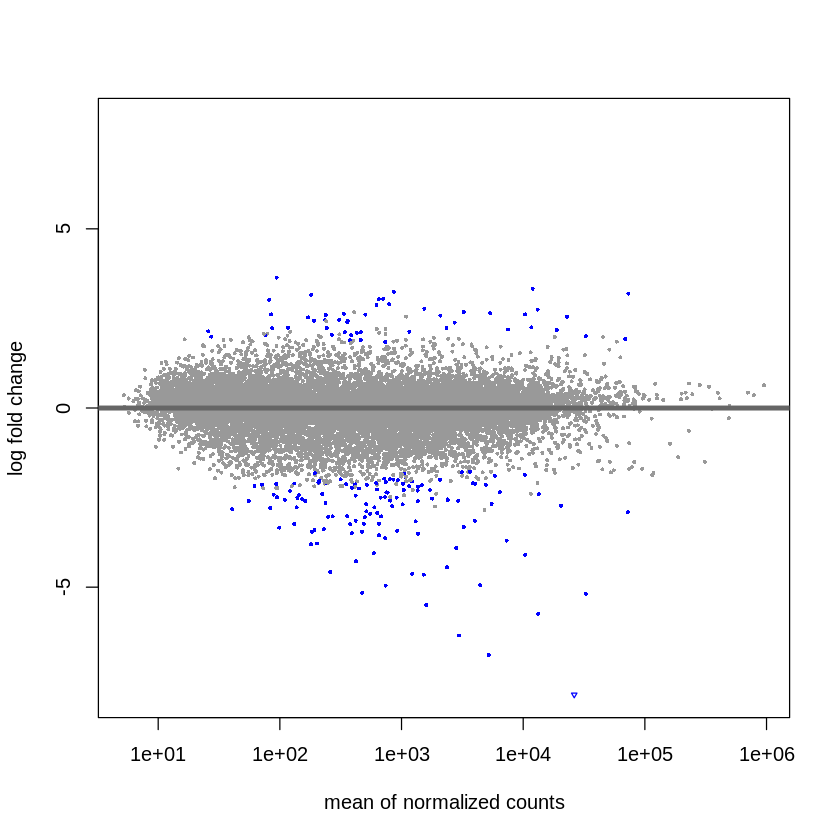

In [36]:
# the function plotMA shows the log2 fold changes attributable to a given variable 
# over the mean of normalized counts for all the samples in the DESeqDataSet. 
# Points will be colored red if the adjusted p value is less than 0.1. 
# Points which fall out of the window are plotted as open triangles pointing either up or down.
 
plotMA(res, ylim = c(-8, 8))

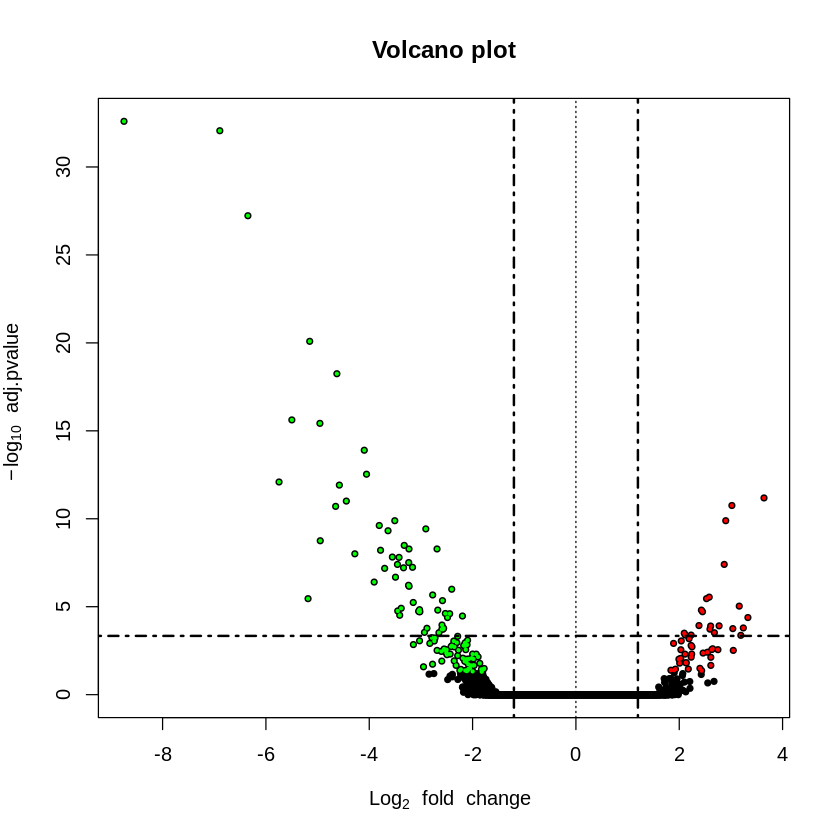

In [37]:
# Volcano Plot
# See https://en.wikipedia.org/wiki/Fold_change

topT <- as.data.frame(res)

#Adjusted P values (FDR Q values)
with(topT, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~adj.pvalue)))
with(subset(topT, padj<=0.05 & log2FoldChange>=1.2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))
with(subset(topT, padj<=0.05 & log2FoldChange<= -1.2), points(log2FoldChange, -log10(padj), pch=20, col="green", cex=0.5))

#Add lines for absolute FC>2 and P-value cut-off at FDR Q<0.05
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-1.2, col="black", lty=4, lwd=2.0)
abline(v=1.2, col="black", lty=4, lwd=2.0)
abline(h=-log10(max(topT$pvalue[topT$padj<=0.05], na.rm=TRUE)), col="black", lty=4, lwd=2.0)


## PART III
## Co-expression networks

### III.1 Extract the relevant data from the differentially expressed ordered gene seen in II.2

In [38]:
# extract the filtered DEGs

res_save <- subset(resOrdered, padj <= 0.05)
final_dt <- as.data.frame(res_save)

In [39]:
# extract the genes 

genes_passed <- rownames(final_dt)

### III.2 Processing

In [40]:
# filter the two datasets expressed in tumor and normal 

rna_expr_data_C <- rna_expr_data_C[genes_passed, ]
rna_expr_data_N <- rna_expr_data_N[genes_passed, ]

In [41]:
# create the correlation datasets for plotting the network for each graph

co_net_corr_dataC <- cor(t(rna_expr_data_C), method = "pearson")
co_net_corr_dataN <- cor(t(rna_expr_data_N), method = "pearson")

In [42]:
# log-transform FPKM data using log2(x+1) of each count
# See https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/

rna_expr_data_C <- log2(rna_expr_data_C+1)
rna_expr_data_N <- log2(rna_expr_data_N+1)

In [43]:
# create the correlation datasets for plotting the network for each graph

co_net_corr_dataC <- cor(t(rna_expr_data_C), method = "pearson")
co_net_corr_dataN <- cor(t(rna_expr_data_N), method = "pearson")

### III.3 Plots and Trasholding

In [44]:
distroRho_pearsC <- co_net_corr_dataC[upper.tri(co_net_corr_dataC)]
distroRho_pearsN <- co_net_corr_dataN[upper.tri(co_net_corr_dataN)]

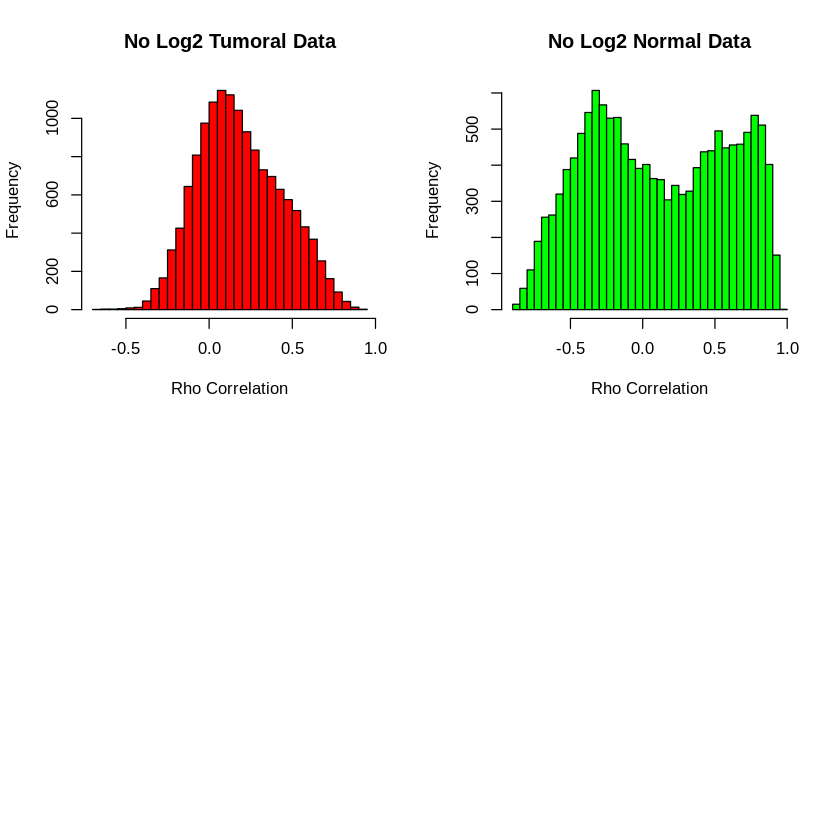

In [62]:
# plot the distribution of the correlations to naively choose a good trashold 

par(mfrow = c(2, 2))
hist(distroRho_pearsC, main = "No Log2 Tumoral Data", col = "red", xlab = "Rho Correlation", breaks = 50)
#points(x = 0.5, y = 0.0, pch = 20, col = "black", cex = 2) # x=0.5 to change accordingly 
hist(distroRho_pearsN, main = "No Log2 Normal Data", col = "green", xlab = "Rho Correlation", breaks = 50)
#points(x = 0.5, y = 0.0, pch = 20, col = "black", cex = 2) # x=0.5 to change accordingly 

In [46]:
# these are probably the threshold candidates 
quantile(abs(distroRho_pearsC))
quantile(abs(distroRho_pearsN))
# Choose trashold = 0.4 as shown below

0%          25%          50%          75%         100% 
3.095782e-05 8.767702e-02 1.950826e-01 3.701449e-01 9.162925e-01

0%          25%          50%          75%         100% 
5.621796e-05 2.186582e-01 4.119146e-01 6.251452e-01 9.522927e-01

### III.4 Fine tuned trasholding

In [47]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




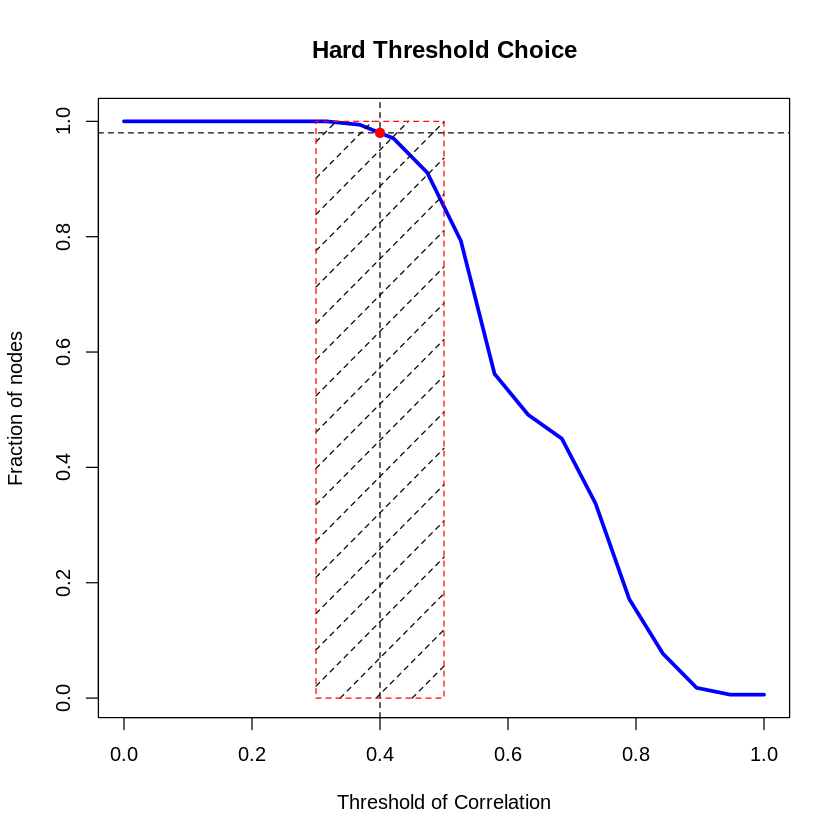

In [59]:
# Find a good threshold 
# Emulate Fiscon lecture (see materials of last year)
# https://classroom.google.com/c/Mjg4MDY4MjkxNDMw

fractionNodes <- function(graph){
  v_graph <- length(V(graph))
  component <- components(graph)
  ind <- which(component$membership == which.max(component$csize))
  LCC <- induced_subgraph(graph , V(graph)[ind])
  v_LCC <- length(V(LCC))
  
  frac_node_LCC <- v_LCC / v_graph
  return(frac_node_LCC)
}

OptimalThresholding <- function(dt, dt2, x){
  # create the correlation datasets for plotting the network for each graph
  co_net_corr_dataC <- cor(t(dt), method = "spearman")
  co_net_corr_dataN <- cor(t(dt2), method = "spearman")
  
  tsh <- x
  co_net_corr_dataC <- ifelse(co_net_corr_dataC <= -abs(tsh) | co_net_corr_dataC >= abs(tsh), 1, 0)
  co_net_corr_dataN <- ifelse(co_net_corr_dataN <= -abs(tsh) | co_net_corr_dataN >= abs(tsh), 1, 0)
  
  gC <- graph_from_adjacency_matrix(co_net_corr_dataC, diag = FALSE)
  gN <- graph_from_adjacency_matrix(co_net_corr_dataN, diag = FALSE)
  
  fracNodes_C <- fractionNodes(gC)
  fracNodes_N <- fractionNodes(gN)
  
  return(mean(fracNodes_C, fracNodes_N))
}

possibletsh <- seq(0, 1, length.out = 20) # the behaviour is symmetric
densities <- unlist(lapply(possibletsh, function(x){
  return(OptimalThresholding(rna_expr_data_C, rna_expr_data_N, x))
}))

plot(possibletsh, densities, col = "blue", type = "l", lwd = 3, xlab = "Threshold of Correlation", ylab = "Fraction of nodes", main = "Hard Threshold Choice")
rect(xleft = 0.3, ybottom = 0.0, xright = 0.5, ytop = 1.0, density = 5, border = "red", lty = 2, lwd = 1)


abline(h = 0.98, lty=2)
abline(v = 0.4, lty=2)
points(x = 0.4, y = 0.98, pch = 20, col = "red", cex = 1.5) # this is our preferable naive-hard thresholding


### III.4 Hubs of genes

In [50]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’




In [51]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
library(cowplot)

In [65]:
library(ggplot2)

ERROR: ignored

## IV Differential Co-expressed Network